In [1]:
import pandas as pd

In [2]:
r''' The United States' National Weather Service (NWS) allows, for free, 
"developers access to critical forecasts, alerts, and observations, along with other weather data."
you can find the full documentation of their API at: https://www.weather.gov/documentation/services-web-api.

this script attempts to use said access to create a simple weather app'''

' The United States\' National Weather Service (NWS) allows, for free, \n"developers access to critical forecasts, alerts, and observations, along with other weather data."\nyou can find the full documentation of their API at: https://www.weather.gov/documentation/services-web-api.\n\nthis script attempts to use said access to create a simple weather app'

In [3]:
base_location = "40.10284429898823,-88.23805168679868" # Champaign, IL

In [4]:
def forecast_url(location = base_location):
    '''returns the weather forecast url for the input location as a string'''
    return f"https://api.weather.gov/points/{location}"

In [5]:
base_forecast_url = forecast_url(base_location)
base_forecast_url

'https://api.weather.gov/points/40.10284429898823,-88.23805168679868'

In [6]:
def forecast_series(location = base_location):
    '''returns the weather forecast JSON for the input location'''
    url = forecast_url(location)
    return pd.read_json(url, typ = 'series')

In [7]:
base_forecast_series = forecast_series(base_location)
base_forecast_series

@context      [https://geojson.org/geojson-ld/geojson-contex...
id              https://api.weather.gov/points/40.1028,-88.2381
type                                                    Feature
geometry      {'type': 'Point', 'coordinates': [-88.2381, 40...
properties    {'@id': 'https://api.weather.gov/points/40.102...
dtype: object

In [8]:
def forecast_properties(typ, input):
    '''returns forecast properties for input location or forecast series'''
    if typ == "location":
        return forecast_series(input)["properties"]
    elif typ == "forecast series":
        return input["properties"]

In [9]:
base_forecast_properties = forecast_properties("forecast series", base_forecast_series)
base_forecast_properties

{'@id': 'https://api.weather.gov/points/40.1028,-88.2381',
 '@type': 'wx:Point',
 'cwa': 'ILX',
 'forecastOffice': 'https://api.weather.gov/offices/ILX',
 'gridId': 'ILX',
 'gridX': 96,
 'gridY': 72,
 'forecast': 'https://api.weather.gov/gridpoints/ILX/96,72/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/ILX/96,72/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/ILX/96,72',
 'observationStations': 'https://api.weather.gov/gridpoints/ILX/96,72/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-88.273652, 40.115057]},
  'properties': {'city': 'Champaign',
   'state': 'IL',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 3316.4853859903},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 114}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/ILZ045',
 'county': 'https://api.weather.gov/zones/county/ILC019',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/ILZ045',


In [10]:
def hourly_forecast_url(typ, input):
    '''returns  the hourly forecast url for input location or forecast series or forecast properties'''
    if typ == "location":
        return forecast_properties("location", input)["forecastHourly"]
    elif typ == "forecast series":
        return forecast_properties("forecast seris", input)["forecastHourly"]
    elif typ == "forecast properties":
        return input["forecastHourly"]

In [11]:
base_hourly_forecast_url = hourly_forecast_url("forecast properties", base_forecast_properties)
base_hourly_forecast_url

'https://api.weather.gov/gridpoints/ILX/96,72/forecast/hourly'

In [12]:
def hourly_forecast_series(typ, input):
    '''returns the weather forecast for various inputs'''
    if typ == "location":
        return pd.read_json(hourly_forecast_url("location", input), typ = 'series')
    elif typ == "forecast series":
        return pd.read_json(hourly_forecast_url("forecast series", input), typ = "series")
    elif typ == "forecast properties":
        return pd.read_json(hourly_forecast_url("forecast properties", input), typ = "series")
    elif typ == "hourly forecast url":
        return pd.read_json(input, typ = "series")

In [13]:
base_hourly_forecast_series = hourly_forecast_series("hourly forecast url", base_hourly_forecast_url)
base_hourly_forecast_series

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-88.2203...
properties    {'units': 'us', 'forecastGenerator': 'HourlyFo...
dtype: object

In [14]:
def hourly_forecast_table(typ, input):
    '''returns the hourly weather forecast as a pandas DataFrame for 6.5 days'''
    if typ == "location":
        return pd.DataFrame(hourly_forecast_series("location", input)["properties"]["periods"])
    elif typ == "hourly_forecast_series":
        return pd.DataFrame(input["properties"]["periods"])

In [16]:
base_hourly_forecast_table = hourly_forecast_table("hourly_forecast_series", base_hourly_forecast_series)
base_hourly_forecast_table

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2025-07-27T07:00:00-05:00,2025-07-27T08:00:00-05:00,True,74,F,,"{'unitCode': 'wmoUnit:percent', 'value': 20}","{'unitCode': 'wmoUnit:degC', 'value': 22.77777...","{'unitCode': 'wmoUnit:percent', 'value': 97}",5 mph,SW,https://api.weather.gov/icons/land/day/tsra_sc...,Slight Chance Showers And Thunderstorms,
1,2,,2025-07-27T08:00:00-05:00,2025-07-27T09:00:00-05:00,True,76,F,,"{'unitCode': 'wmoUnit:percent', 'value': 21}","{'unitCode': 'wmoUnit:degC', 'value': 22.77777...","{'unitCode': 'wmoUnit:percent', 'value': 90}",5 mph,SW,https://api.weather.gov/icons/land/day/tsra_sc...,Slight Chance Showers And Thunderstorms,
2,3,,2025-07-27T09:00:00-05:00,2025-07-27T10:00:00-05:00,True,78,F,,"{'unitCode': 'wmoUnit:percent', 'value': 21}","{'unitCode': 'wmoUnit:degC', 'value': 23.88888...","{'unitCode': 'wmoUnit:percent', 'value': 91}",6 mph,WSW,https://api.weather.gov/icons/land/day/tsra_sc...,Slight Chance Showers And Thunderstorms,
3,4,,2025-07-27T10:00:00-05:00,2025-07-27T11:00:00-05:00,True,80,F,,"{'unitCode': 'wmoUnit:percent', 'value': 20}","{'unitCode': 'wmoUnit:degC', 'value': 23.88888...","{'unitCode': 'wmoUnit:percent', 'value': 85}",6 mph,WSW,https://api.weather.gov/icons/land/day/tsra_sc...,Slight Chance Showers And Thunderstorms,
4,5,,2025-07-27T11:00:00-05:00,2025-07-27T12:00:00-05:00,True,83,F,,"{'unitCode': 'wmoUnit:percent', 'value': 23}","{'unitCode': 'wmoUnit:degC', 'value': 24.44444...","{'unitCode': 'wmoUnit:percent', 'value': 80}",5 mph,WSW,https://api.weather.gov/icons/land/day/tsra_sc...,Slight Chance Showers And Thunderstorms,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2025-08-02T14:00:00-05:00,2025-08-02T15:00:00-05:00,True,76,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 16.11111...","{'unitCode': 'wmoUnit:percent', 'value': 60}",8 mph,ENE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,
152,153,,2025-08-02T15:00:00-05:00,2025-08-02T16:00:00-05:00,True,77,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 16.66666...","{'unitCode': 'wmoUnit:percent', 'value': 60}",8 mph,ENE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,
153,154,,2025-08-02T16:00:00-05:00,2025-08-02T17:00:00-05:00,True,78,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 16.66666...","{'unitCode': 'wmoUnit:percent', 'value': 58}",8 mph,ENE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,
154,155,,2025-08-02T17:00:00-05:00,2025-08-02T18:00:00-05:00,True,77,F,,"{'unitCode': 'wmoUnit:percent', 'value': 8}","{'unitCode': 'wmoUnit:degC', 'value': 16.66666...","{'unitCode': 'wmoUnit:percent', 'value': 60}",7 mph,ENE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,


In [17]:
base_hourly_forecast_table["shortForecast"].value_counts()

shortForecast
Mostly Sunny                               33
Slight Chance Showers And Thunderstorms    30
Chance Showers And Thunderstorms           30
Partly Cloudy                              26
Mostly Cloudy                              18
Partly Sunny                               10
Sunny                                       5
Mostly Clear                                4
Name: count, dtype: int64

<Axes: xlabel='number', ylabel='temperature'>

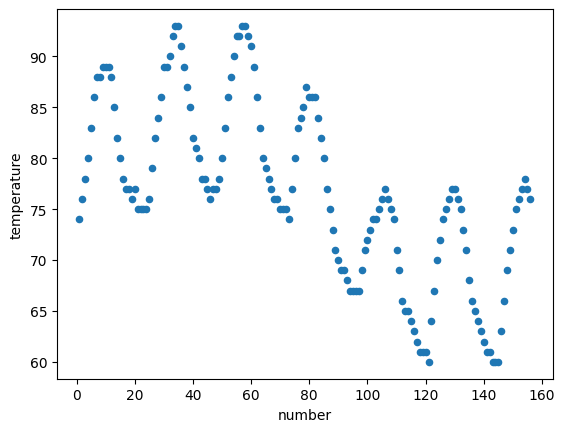

In [18]:
base_hourly_forecast_table.plot.scatter(x = "number", y = "temperature")